<a href="https://colab.research.google.com/github/Dipam-Bhuyan/Dipam-Bhuyan/blob/main/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

data = {
    'name': ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amal', 'Nori'],
    'city': ['Mexico City', 'Toronto', 'Prague', 'Shanghai',
             'Manchester', 'Cairo', 'Osaka'],
    'age': [41, 28, 33, 34, 38, 31, 37],
    'py-score': [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0]
}

row_labels = [101, 102, 103, 104, 105, 106, 107]
df = pd.DataFrame(data=data, index=row_labels)
df

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [ ]:
#print(df.loc[:, 'city'])
#print(df.iloc[:, 1])
#print(df.loc[11:15, ['name', 'city']])
#print(df.iloc[1:6, [0, 1]])
#print(df.iloc[1:6:2, 0])
#print(df.iloc[slice(1, 6, 2), 0])
#print(df.iloc[np.s_[1:6:2], 0])
#print(df.iloc[pd.IndexSlice[1:6:2], 0])
df.loc[:104, 'py-score'] = [40, 50, 60, 70]
print(df)

       name         city  age  py-score
101  Xavier  Mexico City   41      40.0
102     Ann      Toronto   28      50.0
103    Jana       Prague   33      60.0
104      Yi     Shanghai   34      70.0
105   Robin   Manchester   38      68.0
106    Amal        Cairo   31      61.0
107    Nori        Osaka   37      84.0


In [ ]:
data.sample(10)
col=data[["class"]]
print(col.head(150))

              class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


In [ ]:
cols = data.columns
print(cols)
cols = cols[1:5]
print(cols)
data1 = data[cols]
data["total_values"]=data1[cols].sum(axis=1)
print(data1,data)

Index(['Index', 'sepallength', 'sepalwidth', 'petallength', 'petalwidth',
       'class', 'total_values'],
      dtype='object')
Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth'], dtype='object')
     sepallength  sepalwidth  petallength  petalwidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]      Index  sepallength  sepalwidth  petallength  petalwidth           class  \
0        0          5.1         3.5  

In [ ]:
newcols={
"Index":"id"}

data.rename(columns=newcols,inplace=True)

print(data.head())
data.isnull()
data.isnull().sum(axis = 0)

   id  sepallength  sepalwidth  petallength  petalwidth        class  \
0   0          5.1         3.5          1.4         0.2  Iris-setosa   
1   1          4.9         3.0          1.4         0.2  Iris-setosa   
2   2          4.7         3.2          1.3         0.2  Iris-setosa   
3   3          4.6         3.1          1.5         0.2  Iris-setosa   
4   4          5.0         3.6          1.4         0.2  Iris-setosa   

   total_values  
0          10.2  
1           9.5  
2           9.4  
3           9.4  
4          10.2  


id              0
sepallength     0
sepalwidth      0
petallength     0
petalwidth      0
class           0
total_values    0
dtype: int64

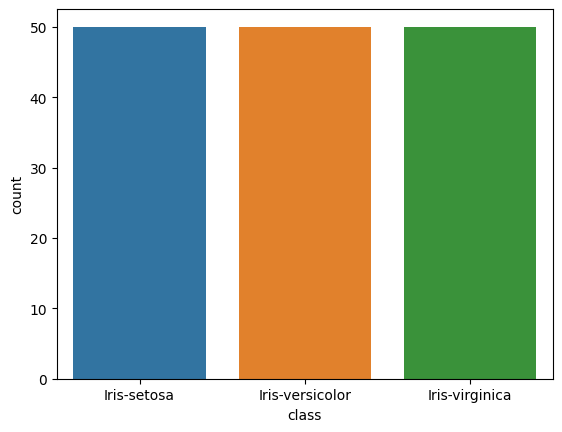

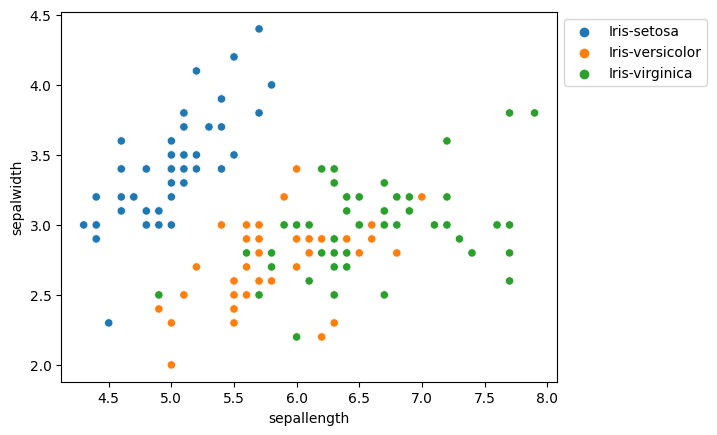

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="class", data=data)
plt.show()
sns.scatterplot(x='sepallength', y='sepalwidth',
                hue='class', data=data, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

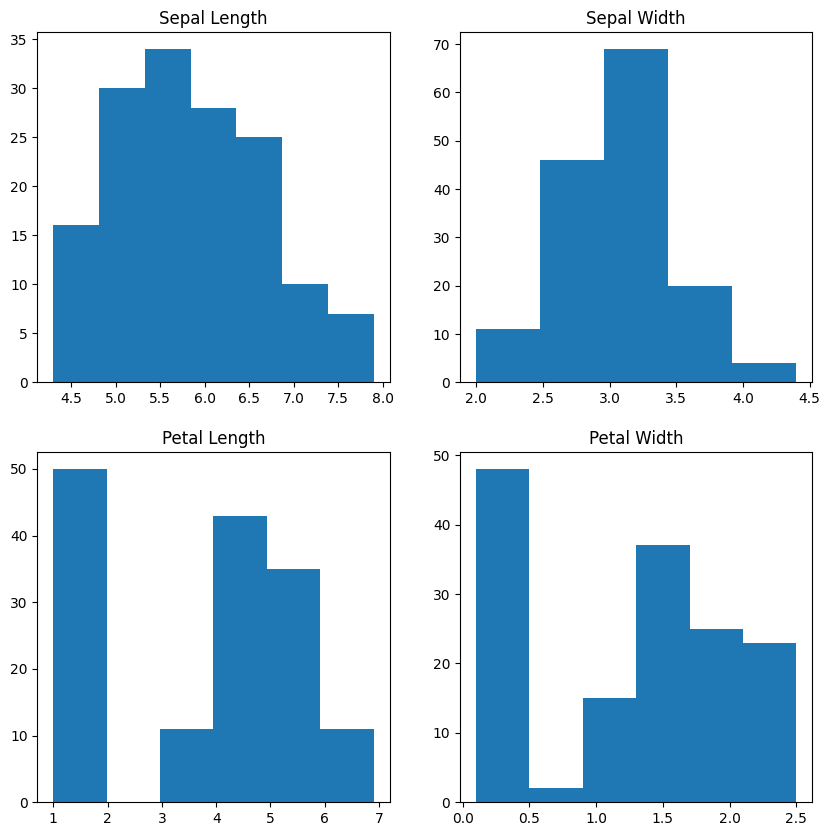

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(data['sepallength'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(data['sepalwidth'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(data['petallength'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(data['petalwidth'], bins=6);

<Axes: xlabel='sepalwidth'>

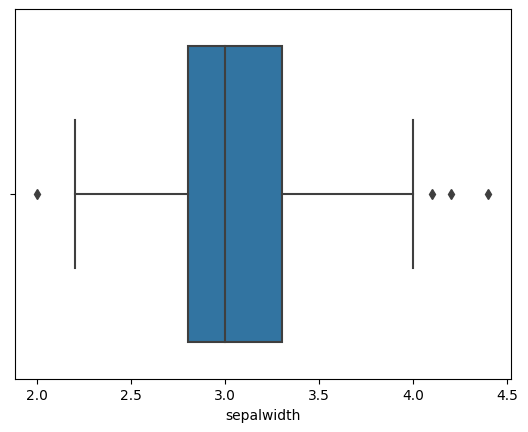

In [ ]:
sns.boxplot(x='sepalwidth', data=data)

In [ ]:
import numpy as np
Q1 = np.percentile(df['sepalwidth'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['sepalwidth'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)
upper = np.where(df['sepalwidth'] >= (Q3+1.5*IQR))
lower = np.where(df['sepalwidth'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='sepalwidth', data=df)
